In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use ('ggplot')
np.random.seed(42)
# 使用分类模型预测类标签
# k-NN算法可以说是机器学习算法中最简单的一个。原因是我们基本上只需要存储训练数据集。然后，要预测一个新的数据点，我们只需要找到训练数据集中最近的数据点：它的最近邻居。

In [2]:
def generate_data(num_samples, num_features=2):
    """随机生成一些数据点"""
    data_size = (num_samples, num_features)
    train_data = np.random.randint(0, 100, size=data_size)
    labels_size = (num_samples, 1)
    labels = np.random.randint(0, 2, size=labels_size)
    
    return train_data.astype(np.float32), labels

In [3]:
train_data, labels = generate_data(11)

Text(0, 0.5, 'y coordinate')

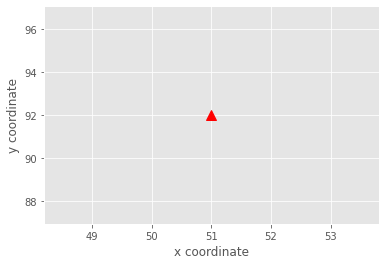

In [4]:
plt.plot(train_data[0, 0], train_data[0, 1], color='r', marker='^', markersize=10)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

In [5]:
def plot_data(all_blue, all_red):
    plt.figure(figsize=(10, 6))
    plt.scatter(all_blue[:, 0], all_blue[:, 1], c='b', marker='s', s=180)
    plt.scatter(all_red[:, 0], all_red[:, 1], c='r', marker='^', s=180)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')

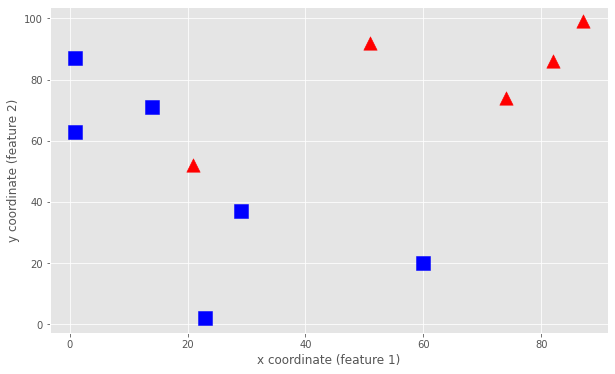

In [6]:
blue = train_data[labels.ravel() == 0]
red = train_data[labels.ravel() == 1]
plot_data(blue, red)

In [7]:
# 创建一个分类器
knn = cv2.ml.KNearest_create()

In [8]:
# 将训练数据传递给train方法
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)

True

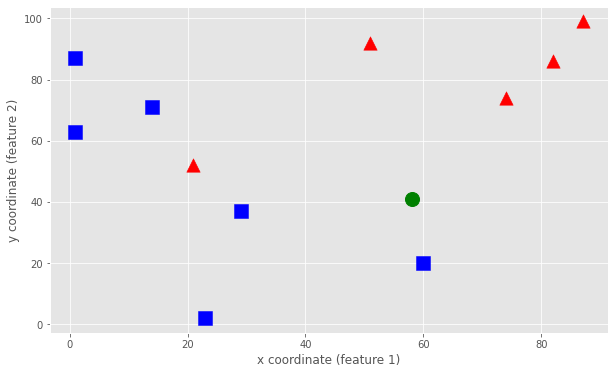

In [9]:
newcomer, _ = generate_data(1)
plot_data(blue, red)
plt.plot(newcomer[0, 0], newcomer[0, 1], 'go', markersize=14);

In [10]:
# k = 1
ret, results, neighbor, dist = knn.findNearest(newcomer, 1)
print("预测标签：\t", results)
print("临近标签：\t", neighbor)
print("与临近标签距离：\t", dist)

预测标签：	 [[0.]]
临近标签：	 [[0.]]
与临近标签距离：	 [[445.]]


In [11]:
# k = 7
ret, results, neighbor, dist = knn.findNearest(newcomer, 7)
print("预测标签：\t", results)
print("临近标签：\t", neighbor)
print("与临近标签距离：\t", dist)

预测标签：	 [[1.]]
临近标签：	 [[0. 0. 1. 1. 1. 1. 0.]]
与临近标签距离：	 [[ 445.  857. 1345. 1490. 2601. 2650. 2746.]]
